In [1]:
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import sys
# Point to the project root (adjust parents[1] to parents[2] if your notebook is deeper)
PROJECT_ROOT = Path.cwd().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

# <-- Imports custom preprocessing functions from 'functions.py' <-- #

# from lib.functions import ()

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# #for preprocessing
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# #models
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB

# <-- Loads YAML configuration to dynamically reference CSV output files. <-- #

config = None  # <-- Initialize config
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")

In [11]:
# load dataset
df_fraud_dataset = pd.read_csv(config['input_data']['file1'])
df_fraud_dataset.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [12]:
df_fraud_dataset.info(), df_fraud_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

(None,
 Transaction_ID                  0
 User_ID                         0
 Transaction_Amount              0
 Transaction_Type                0
 Timestamp                       0
 Account_Balance                 0
 Device_Type                     0
 Location                        0
 Merchant_Category               0
 IP_Address_Flag                 0
 Previous_Fraudulent_Activity    0
 Daily_Transaction_Count         0
 Avg_Transaction_Amount_7d       0
 Failed_Transaction_Count_7d     0
 Card_Type                       0
 Card_Age                        0
 Transaction_Distance            0
 Authentication_Method           0
 Risk_Score                      0
 Is_Weekend                      0
 Fraud_Label                     0
 dtype: int64)

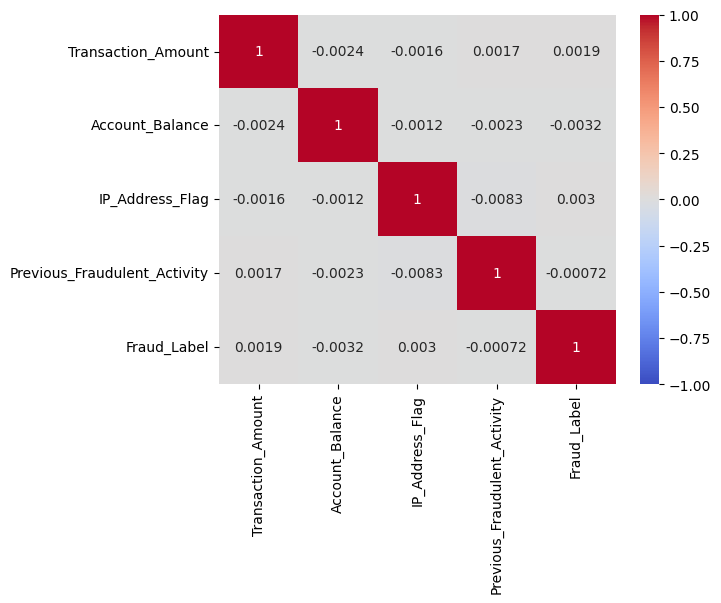

In [13]:
cols = ['Transaction_Amount','Account_Balance','IP_Address_Flag','Previous_Fraudulent_Activity','Fraud_Label']
figsize=(15, 4)
             
corr_v = df_fraud_dataset[cols].corr()
sns.heatmap(corr_v, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
set_title = ("Variation — Correlation matrix")

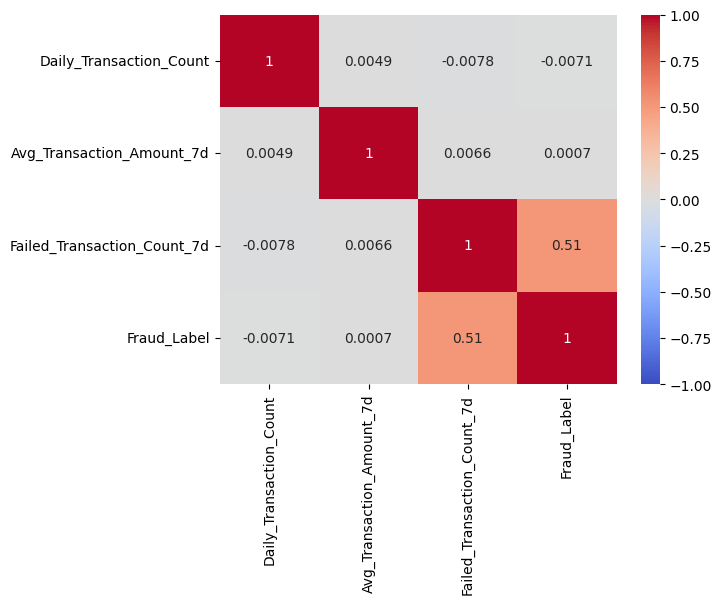

In [14]:
cols = ['Daily_Transaction_Count','Avg_Transaction_Amount_7d','Failed_Transaction_Count_7d','Fraud_Label']
figsize=(15, 4)
             
corr_v = df_fraud_dataset[cols].corr()
sns.heatmap(corr_v, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
set_title = ("Variation — Correlation matrix")

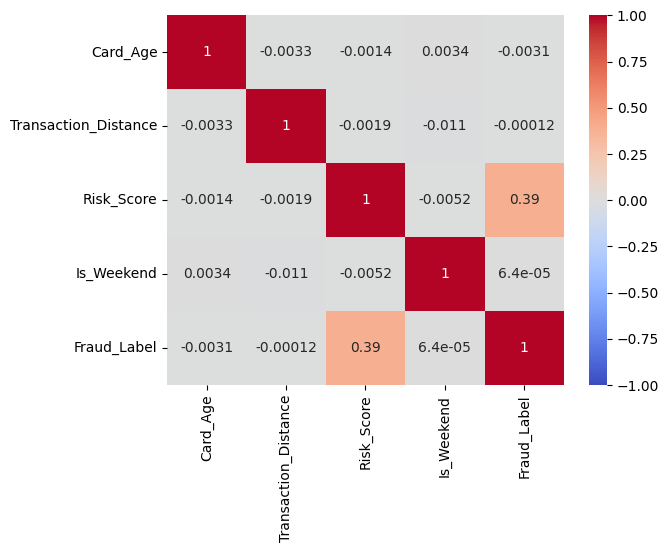

In [15]:
cols = ['Card_Age','Transaction_Distance','Risk_Score','Is_Weekend','Fraud_Label']
figsize=(15, 4)
             
corr_v = df_fraud_dataset[cols].corr()
sns.heatmap(corr_v, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
set_title = ("Variation — Correlation matrix")

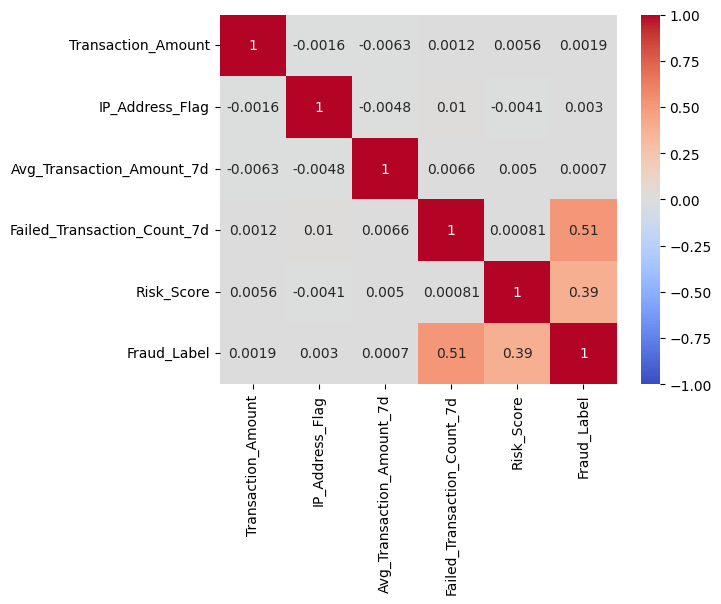

In [22]:
cols = ['Transaction_Amount','IP_Address_Flag','Avg_Transaction_Amount_7d','Failed_Transaction_Count_7d','Risk_Score','Fraud_Label']
figsize=(15, 4)
             
corr_v = df_fraud_dataset[cols].corr()
sns.heatmap(corr_v, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
set_title = ("Variation — Correlation matrix")

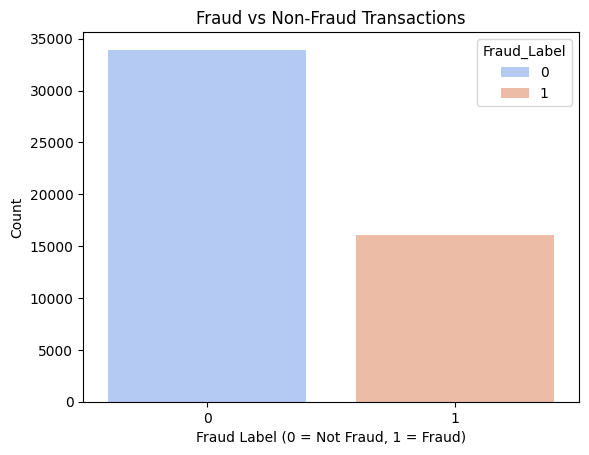

In [17]:
sns.countplot(x=df_fraud_dataset['Fraud_Label'], hue=df_fraud_dataset['Fraud_Label'], palette='coolwarm')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraud Label (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

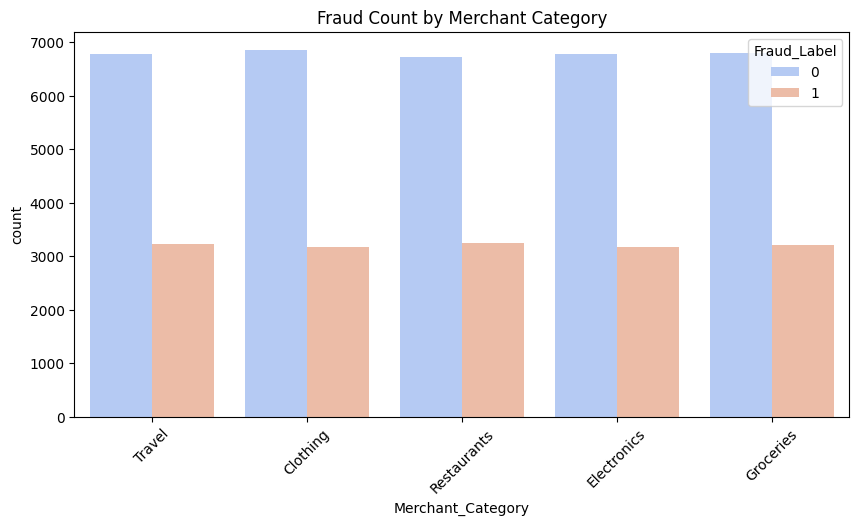

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='Merchant_Category', hue='Fraud_Label', data=df_fraud_dataset, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Fraud Count by Merchant Category")
plt.show()

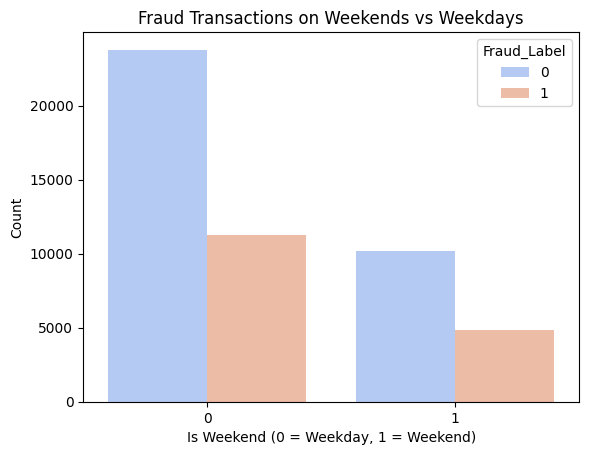

In [19]:
sns.countplot(x=df_fraud_dataset['Is_Weekend'], hue=df_fraud_dataset['Fraud_Label'], palette='coolwarm')
plt.title("Fraud Transactions on Weekends vs Weekdays")
plt.xlabel("Is Weekend (0 = Weekday, 1 = Weekend)")
plt.ylabel("Count")
plt.show()

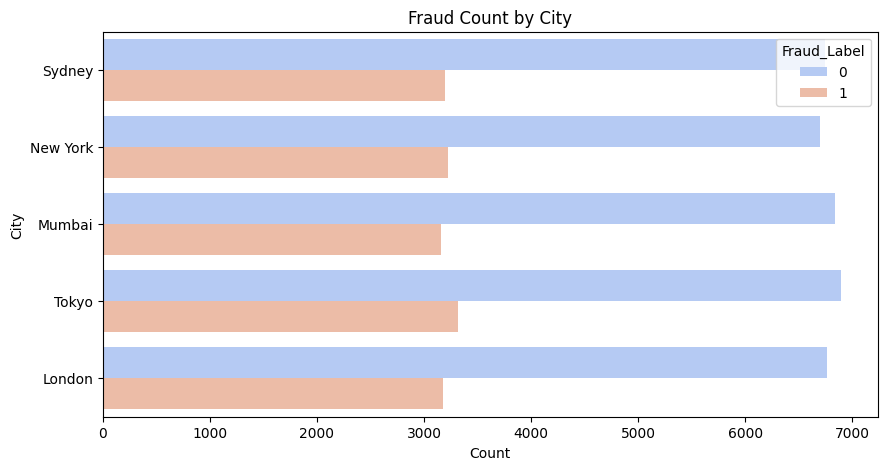

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(y=df_fraud_dataset['Location'], hue=df_fraud_dataset['Fraud_Label'], palette='coolwarm')
plt.title("Fraud Count by City")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()